In [1]:
%load_ext autoreload
%config Completer.use_jedi = False
%autoreload 2
from preprocess import *
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


In [20]:
base_df = pd.read_csv("/Users/ahung/Downloads/aita_preprocessed.csv", sep = "\t")

In [3]:
X = base_df.processed_body.values

In [4]:
unigram_vectorizer = TfidfVectorizer(ngram_range = (1,1), max_df = 0.75, min_df = 0.01)

In [21]:
uni_df = unigram_vectorizer.fit_transform(X)

In [11]:
uni_df = pd.DataFrame.sparse.from_spmatrix(uni_df)

In [48]:
uni_df

,0,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.132722,0.000000,0.130041,0.068166,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97623,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.057328,0.000000,0.0,0.0,0.000000,0.0,0.0
97624,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.030048,0.000000,0.0,0.0,0.046787,0.0,0.0
97625,0.0,0.047369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.027140,0.000000,0.0,0.0,0.000000,0.0,0.0
97626,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.089803,0.000000,0.000000,0.203164,0.0,0.0,0.000000,0.0,0.0


In [7]:
bigram_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_df = 0.75, min_df = 0.01)
bi_df = bigram_vectorizer.fit_transform(X)

In [8]:
bi_df = pd.DataFrame.sparse.from_spmatrix(bi_df)

In [9]:
trigram_vectorizer = TfidfVectorizer(ngram_range = (1, 3), max_df = 0.75, min_df = 0.01)
tri_df = trigram_vectorizer.fit_transform(X)

In [10]:
tri_df = pd.DataFrame.sparse.from_spmatrix(tri_df)

In [11]:
print("unigram shape: ", uni_df.shape)
print("bigram shape: ", bi_df.shape)
print("trigram shape: ", tri_df.shape)

unigram shape:  (97628, 1683)
bigram shape:  (97628, 2990)
trigram shape:  (97628, 3063)


In [229]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(uni_df, y, test_size=0.2, random_state=448, stratify = y)

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = -1, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

[CV 2/5] END ..................C=0.01, l1_ratio=0;, score=nan total time=   0.0s
[CV 5/5] END ..................C=0.01, l1_ratio=0;, score=nan total time=   0.0s
[CV 5/5] END ................C=0.01, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 4/5] END ................C=0.01, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 2/5] END ................C=0.01, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4/5] END ................C=0.01, l1_ratio=0.6;, score=nan total time=   0.0s
[CV 4/5] END ..................C=0.01, l1_ratio=1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=0.1, l1_ratio=0;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.1, l1_ratio=0;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.1, l1_ratio=0.2;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.1, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.1, l1_ratio=0.4;, score=nan total time=   0.0s
[CV 1/5] END ...............

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Had balanced accuracy 0.5998778661956203


In [231]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))

Had optimal parameters{'C': 0.1, 'l1_ratio': 0.2}


In [232]:
import joblib
joblib.dump(logistic_classifier.best_estimator_, 'unigram_filtered.pkl')

['unigram_filtered.pkl']

In [233]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(bi_df, y, test_size=0.2, random_state=448, stratify = y)

In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

[CV 2/5] END ..............C=0.01, l1_ratio=0.2;, score=0.572 total time=  12.1s
[CV 4/5] END ..............C=0.01, l1_ratio=0.4;, score=0.565 total time=  11.6s
[CV 2/5] END ..............C=0.01, l1_ratio=0.8;, score=0.542 total time=  12.9s
[CV 5/5] END ................C=0.01, l1_ratio=1;, score=0.530 total time=  13.6s
[CV 3/5] END ...............C=0.1, l1_ratio=0.2;, score=0.595 total time=  22.6s
[CV 2/5] END ...............C=0.1, l1_ratio=0.6;, score=0.597 total time=  15.1s
[CV 3/5] END ...............C=0.1, l1_ratio=0.8;, score=0.590 total time=  13.1s
[CV 1/5] END ...................C=1, l1_ratio=0;, score=0.601 total time=  11.5s
[CV 4/5] END .................C=1, l1_ratio=0.2;, score=0.597 total time=  28.4s
[CV 2/5] END .................C=1, l1_ratio=0.6;, score=0.596 total time=  25.5s
[CV 5/5] END .................C=1, l1_ratio=0.8;, score=0.592 total time=  25.3s
[CV 2/5] END ................C=10, l1_ratio=0.2;, score=0.591 total time=  33.6s
[CV 4/5] END ...............

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 3/5] END ................C=0.01, l1_ratio=0;, score=0.586 total time=  10.5s
[CV 2/5] END ..............C=0.01, l1_ratio=0.2;, score=0.569 total time=  11.2s
[CV 1/5] END ..............C=0.01, l1_ratio=0.4;, score=0.549 total time=  10.3s
[CV 5/5] END ..............C=0.01, l1_ratio=0.4;, score=0.552 total time=  10.2s
[CV 4/5] END ..............C=0.01, l1_ratio=0.6;, score=0.551 total time=  10.1s
[CV 3/5] END ..............C=0.01, l1_ratio=0.8;, score=0.532 total time=  10.2s
[CV 2/5] END ................C=0.01, l1_ratio=1;, score=0.525 total time=  10.7s
[CV 1/5] END .................C=0.1, l1_ratio=0;, score=0.607 total time=   9.9s
[CV 4/5] END .................C=0.1, l1_ratio=0;, score=0.605 total time=   9.7s
[CV 3/5] END ...............C=0.1, l1_ratio=0.2;, score=0.594 total time=  21.8s
[CV 3/5] END ...............C=0.1, l1_ratio=0.4;, score=0.594 total time=  17.0s
[CV 2/5] END ...............C=0.1, l1_ratio=0.6

In [49]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))

Had optimal parameters{'C': 0.1, 'l1_ratio': 0}


In [235]:
joblib.dump(logistic_classifier.best_estimator_, 'bigram_filtered.pkl')

['bigram_filtered.pkl']

In [236]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(tri_df, y, test_size=0.2, random_state=448, stratify = y)

In [237]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 2/5] END ................C=0.01, l1_ratio=0;, score=0.593 total time=  11.6s
[CV 1/5] END ..............C=0.01, l1_ratio=0.2;, score=0.562 total time=  12.4s
[CV 5/5] END ..............C=0.01, l1_ratio=0.2;, score=0.564 total time=  13.3s
[CV 5/5] END ..............C=0.01, l1_ratio=0.4;, score=0.551 total time=  11.2s
[CV 4/5] END ..............C=0.01, l1_ratio=0.6;, score=0.551 total time=  14.4s
[CV 3/5] END ..............C=0.01, l1_ratio=0.8;, score=0.532 total time=  11.9s
[CV 2/5] END ................C=0.01, l1_ratio=1;, score=0.525 total time=  11.8s
[CV 1/5] END .................C=0.1, l1_ratio=0;, score=0.606 total time=  11.2s
[CV 4/5] END .................C=0.1, l1_ratio=0;, score=0.606 total time=  10.6s
[CV 3/5] END ...............C=0.1, l1_ratio=0.2;, score=0.594 total time=  23.8s
[CV 2/5] END ...............C=0.1, l1_ratio=0.4;, score=0.601 total time=  16.9s
[CV 1/5] END ...............C=0.1, l1_ratio=0.6

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 5/5] END .................C=100, l1_ratio=0;, score=0.590 total time=  27.3s
[CV 3/5] END ...............C=100, l1_ratio=0.2;, score=0.585 total time= 8.2min
[CV 2/5] END ...............C=100, l1_ratio=0.4;, score=0.593 total time=10.3min
[CV 1/5] END ...............C=100, l1_ratio=0.6;, score=0.592 total time= 8.3min
[CV 5/5] END ...............C=100, l1_ratio=0.6;, score=0.590 total time= 9.4min
[CV 4/5] END ...............C=100, l1_ratio=0.8;, score=0.587 total time= 9.7min
[CV 2/5] END .................C=100, l1_ratio=1;, score=0.593 total time= 5.8min
Had balanced accuracy 0.606870420313832


In [53]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))

Had optimal parameters{'C': 0.1, 'l1_ratio': 0}


In [54]:
joblib.dump(logistic_classifier.best_estimator_, 'trigram_filtered.pkl')

['trigram_filtered.pkl']

In [58]:
tri_df.shape

(97628, 3063)

In [72]:
import pandas as pd
liwc = pd.read_csv("/Users/ahung/Downloads/LIWC-22 Results - aita_clean - LIWC Analysis.csv")

In [61]:
liwc.columns

Index(['Segment', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'BigWords', 'Dic', 'Linguistic',
       ...
       'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'QMark', 'Exclam',
       'Apostro', 'OtherP', 'Emoji'],
      dtype='object', length=119)

In [73]:
liwc_uni = pd.concat([uni_df, liwc], axis = 1)

In [74]:
liwc_uni.columns = liwc_uni.columns.astype(str)

In [79]:
y_test

19217    0
91774    0
84836    0
95086    0
40096    0
        ..
43562    0
40437    0
5907     0
40457    1
92238    0
Name: is_asshole, Length: 19526, dtype: int64

In [73]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(liwc_uni, y, test_size=0.2, random_state=448)

In [80]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/lin

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarnin

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.p

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarnin

KeyboardInterrupt: 

In [239]:
from sklearn.decomposition import PCA
pca50 = PCA(n_components = 50)
pca100 = PCA(n_components = 100)
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(uni_df, y, test_size=0.2, random_state=448, stratify = y)
# X_train = X_train.toarray()
pca50.fit(X_train.to_numpy())
pca100.fit(X_train.to_numpy())

PCA(n_components=100)

In [93]:
print(pca50.transform(X_train.to_numpy()).shape)

(78102, 50)


In [240]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(pca50.transform(X_train.to_numpy()), y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [241]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))

Had optimal parameters{'C': 0.1, 'l1_ratio': 0.4}


In [242]:
y_pred = logistic_classifier.predict(pca50.transform(X_test.to_numpy()))
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had balanced accuracy 0.5682443383633062


In [243]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(pca100.transform(X_train.to_numpy()), y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [244]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))

Had optimal parameters{'C': 0.1, 'l1_ratio': 0.6}


In [245]:
y_pred = logistic_classifier.predict(pca100.transform(X_test.to_numpy()))
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had balanced accuracy 0.577535341206642


In [246]:
from sklearn.decomposition import PCA
pca50 = PCA(n_components = 50)
pca100 = PCA(n_components = 100)
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(bi_df, y, test_size=0.2, random_state=448, stratify = y)
# X_train = X_train.toarray()
pca50.fit(X_train.to_numpy())
pca100.fit(X_train.to_numpy())

PCA(n_components=100)

In [247]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(pca50.transform(X_train.to_numpy()), y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [248]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))

Had optimal parameters{'C': 0.1, 'l1_ratio': 0.6}


In [249]:
y_pred = logistic_classifier.predict(pca50.transform(X_test.to_numpy()))
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had balanced accuracy 0.5766313378358825


In [250]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(pca100.transform(X_train.to_numpy()), y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [251]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))

Had optimal parameters{'C': 10, 'l1_ratio': 0.8}


In [252]:
y_pred = logistic_classifier.predict(pca100.transform(X_test.to_numpy()))
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had balanced accuracy 0.5811567116681143


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(liwc)
liwc_scaled = scaler.transform(liwc)

In [15]:
liwc.shape

(97628, 119)

In [130]:
bi_df_pca_100 = pca100.transform(bi_df.sparse.to_dense())
liwc_bi_pca_100 = pd.concat([pd.DataFrame(bi_df_pca_100), pd.DataFrame(liwc_scaled)], axis = 1)

In [131]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(liwc_bi_pca_100, y, test_size=0.2, random_state=448)

In [132]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
X_train.columns = X_train.columns.astype(str)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

[CV 1/5] END ................C=0.01, l1_ratio=0;, score=0.574 total time=  31.2s
[CV 5/5] END ................C=0.01, l1_ratio=0;, score=0.588 total time= 1.1min
[CV 4/5] END ..............C=0.01, l1_ratio=0.2;, score=0.575 total time= 1.9min
[CV 3/5] END ..............C=0.01, l1_ratio=0.4;, score=0.572 total time= 2.0min
[CV 2/5] END ..............C=0.01, l1_ratio=0.6;, score=0.572 total time= 2.0min
[CV 1/5] END ..............C=0.01, l1_ratio=0.8;, score=0.568 total time= 1.3min
[CV 5/5] END ..............C=0.01, l1_ratio=0.8;, score=0.578 total time= 2.1min
[CV 4/5] END ................C=0.01, l1_ratio=1;, score=0.568 total time= 2.7min
[CV 3/5] END .................C=0.1, l1_ratio=0;, score=0.590 total time= 1.8min
[CV 2/5] END ...............C=0.1, l1_ratio=0.2;, score=0.589 total time= 3.0min
[CV 1/5] END ...............C=0.1, l1_ratio=0.4;, score=0.584 total time= 3.0min
[CV 5/5] END ...............C=0.1, l1_ratio=0.4;, score=0.596 total time= 3.1min
[CV 4/5] END ...............

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [133]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))

Had optimal parameters{'C': 1, 'l1_ratio': 1}


In [134]:
y_pred = logistic_classifier.predict(X_test.to_numpy())
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had balanced accuracy 0.5864993571229166


/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [136]:
liwc_scaled

array([[ 0.        , -1.36778558,  1.90362778, ..., -1.20933654,
         8.27581853, -0.04749527],
       [ 0.        , -1.15644752,  0.36566307, ...,  1.22223399,
         2.79675451, -0.04749527],
       [ 0.        , -1.82297523,  2.97719199, ..., -1.81722917,
        -1.03546337, -0.04749527],
       ...,
       [ 0.        ,  0.14409433,  1.59151822, ..., -1.50443005,
        -0.38923261, -0.04749527],
       [ 0.        , -0.52785229,  0.76405152, ...,  0.2897385 ,
        -1.03546337, -0.04749527],
       [ 0.        ,  0.32833776, -0.5915115 , ...,  0.77369185,
        -0.61159158, -0.04749527]])

In [137]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(liwc_scaled, y, test_size=0.2, random_state=448)

In [139]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)

logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [140]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))

Had optimal parameters{'C': 0.1, 'l1_ratio': 0.2}


In [ ]:
# y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

In [142]:
df_features = pd.read_csv("/Users/ahung/Downloads/features.csv")

In [253]:
from sklearn.decomposition import PCA
pca50 = PCA(n_components = 50)
pca100 = PCA(n_components = 100)
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(tri_df, y, test_size=0.2, random_state=448, stratify = y)
# X_train = X_train.toarray()
pca50.fit(X_train.to_numpy())
pca100.fit(X_train.to_numpy())

PCA(n_components=100)

In [254]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(pca50.transform(X_train.to_numpy()), y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [255]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(pca50.transform(X_test.to_numpy()))
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 1, 'l1_ratio': 0.8}
Had balanced accuracy 0.5756696276083181


In [256]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(pca100.transform(X_train.to_numpy()), y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [257]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(pca100.transform(X_test.to_numpy()))
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 100, 'l1_ratio': 0.4}
Had balanced accuracy 0.5817945368579212


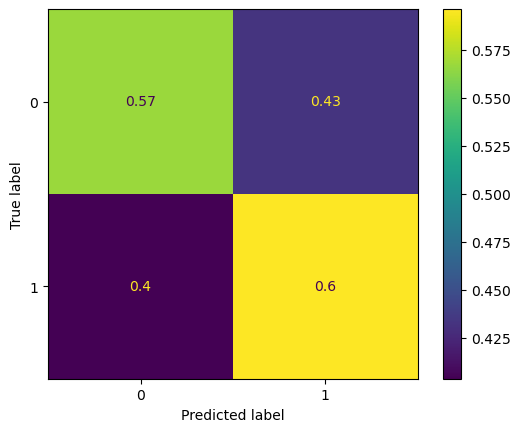

In [258]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels = logistic_classifier.classes_, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logistic_classifier.classes_)
disp.plot()
plt.show()

In [81]:
emotion = pd.read_csv("/Users/ahung/Downloads/aita_emotion_final.csv")

In [82]:
emotion = emotion.loc[:,["Anger", "Joy", "Optimism", "Sadness"]]

In [175]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(emotion, y, test_size=0.2, random_state=448, stratify = y)

In [176]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [178]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 100, 'l1_ratio': 0.6}
Had balanced accuracy 0.5297331397324863


In [83]:
topics = pd.read_csv("/Users/ahung/Downloads/aita_topics_5.csv", sep = "\t")

In [84]:
topics = topics.loc[:, ["TopicProb0", "TopicProb1", "TopicProb2", "TopicProb3", "TopicProb4"]]

In [186]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(emotion, y, test_size=0.2, random_state=448, stratify = y)

In [187]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [188]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 100, 'l1_ratio': 0.6}
Had balanced accuracy 0.5297331397324863


In [80]:
df_feat = pd.read_csv("/Users/ahung/Downloads/aita_emotion_final.csv")

In [71]:
df_feat = df_feat.loc[:, ["timestamp", "score", "edited", "num_comments"]]
df_feat.loc[df_feat["edited"] != "FALSE", "edited"] = 1
df_feat.loc[df_feat["edited"] == "FALSE", "edited"] = 0
# scaler = StandardScaler()
# scaler.fit(df_feat)
# df_feat = scaler.transform(df_feat)

In [198]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.2, random_state=448, stratify = y)

In [199]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [200]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 1, 'l1_ratio': 1}
Had balanced accuracy 0.5919974194214972


In [203]:
logistic_classifier.best_estimator_.coef_

array([[-0.00643877, -0.79511462,  0.        ,  0.78019431]])

In [22]:
doc2vec_150 = pd.read_csv("/Users/ahung/Downloads/aita_doc2vec_150.csv", sep = "\t")
doc2vec_200 = pd.read_csv("/Users/ahung/Downloads/aita_doc2vec_200.csv", sep = "\t")
doc2vec_300 = pd.read_csv("/Users/ahung/Downloads/aita_doc2vec_300.csv", sep = "\t")

In [23]:
doc2vec_150 = doc2vec_150.drop("Unnamed: 0", axis = 1)

In [24]:
doc2vec_150 = doc2vec_150.drop("id", axis = 1)

In [215]:
doc2vec_150.columns

Index(['Dim 0', 'Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6', 'Dim 7',
       'Dim 8', 'Dim 9',
       ...
       'Dim 140', 'Dim 141', 'Dim 142', 'Dim 143', 'Dim 144', 'Dim 145',
       'Dim 146', 'Dim 147', 'Dim 148', 'Dim 149'],
      dtype='object', length=150)

In [216]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(doc2vec_150, y, test_size=0.2, random_state=448, stratify = y)

In [217]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [218]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 0.01, 'l1_ratio': 0.4}
Had balanced accuracy 0.5050213849518339


In [25]:
doc2vec_200 = doc2vec_200.drop("Unnamed: 0", axis = 1)
doc2vec_200 = doc2vec_200.drop("id", axis = 1)

In [220]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(doc2vec_200, y, test_size=0.2, random_state=448, stratify = y)

In [221]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [223]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 0.01, 'l1_ratio': 1}
Had balanced accuracy 0.5047282892802301


In [26]:
doc2vec_300 = doc2vec_300.drop("Unnamed: 0", axis = 1)
doc2vec_300 = doc2vec_300.drop("id", axis = 1)

In [225]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(doc2vec_300, y, test_size=0.2, random_state=448, stratify = y)

In [226]:
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [227]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 0.01, 'l1_ratio': 0.2}
Had balanced accuracy 0.5058616349752774


In [32]:
uni_df_liwc = pd.concat([uni_df, pd.DataFrame(liwc_scaled)], axis = 1)

In [39]:
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(uni_df_liwc, y, test_size=0.2, random_state=448, stratify = y)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/uti

KeyboardInterrupt: 

In [6]:
import mrmr

In [35]:
top_20_feats_liwc = mrmr.mrmr_classif(X = pd.DataFrame(liwc_scaled), y = base_df["is_asshole"], K = 60)

[CV 2/5] END ................C=0.01, l1_ratio=0;, score=0.572 total time=   0.6s
[CV 1/5] END ..............C=0.01, l1_ratio=0.2;, score=0.561 total time=   1.0s
[CV 2/5] END ..............C=0.01, l1_ratio=0.4;, score=0.571 total time=   0.8s
[CV 5/5] END ..............C=0.01, l1_ratio=0.4;, score=0.569 total time=   1.1s
[CV 5/5] END ..............C=0.01, l1_ratio=0.6;, score=0.568 total time=   0.9s
[CV 4/5] END ..............C=0.01, l1_ratio=0.8;, score=0.572 total time=   0.8s
[CV 1/5] END ................C=0.01, l1_ratio=1;, score=0.561 total time=   1.1s
[CV 5/5] END ................C=0.01, l1_ratio=1;, score=0.568 total time=   1.0s
[CV 1/5] END ...............C=0.1, l1_ratio=0.2;, score=0.561 total time=   1.1s
[CV 5/5] END ...............C=0.1, l1_ratio=0.2;, score=0.569 total time=   0.9s
[CV 4/5] END ...............C=0.1, l1_ratio=0.4;, score=0.572 total time=   0.9s
[CV 2/5] END ...............C=0.1, l1_ratio=0.6;, score=0.572 total time=   1.0s
[CV 2/5] END ...............

100%|███████████████████████████████████████████████████████████████| 60/60 [00:19<00:00,  3.01it/s]


In [31]:
liwc.columns[top_20_feats_liwc]

Index(['family', 'time', 'mental', 'sexual', 'discrep', 'swear', 'i', 'visual',
       'moral', 'allure', 'you', 'they', 'food', 'need', 'Conversation', 'WC',
       'Authentic', 'Dic', 'ipron', 'want', 'emo_anger', 'leisure', 'Period',
       'emo_anx', 'focuspresent', 'home', 'allnone', 'Drives', 'netspeak',
       'relig', 'insight', 'focuspast', 'negate', 'female', 'prosocial',
       'article', 'prep', 'illness', 'memory', 'male', 'attention', 'friend',
       'certitude', 'comm', 'power', 'OtherP', 'health', 'focusfuture',
       'money', 'QMark'],
      dtype='object')

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(liwc_scaled[:,top_20_feats_liwc], y, test_size=0.2, random_state=448, stratify = y)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [38]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 0.01, 'l1_ratio': 0.8}
Had balanced accuracy 0.5660915755838895


In [60]:
top_topics = mrmr.mrmr_classif(X = topics, y = base_df["is_asshole"], K = 10)

100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.96it/s]


In [63]:
liwc.columns[top_20_feats_liwc]

Index(['family', 'time', 'mental', 'sexual', 'discrep', 'swear', 'i', 'visual',
       'moral', 'allure', 'you', 'they', 'food', 'need', 'Conversation', 'WC',
       'Authentic', 'Dic', 'ipron', 'want', 'emo_anger', 'leisure', 'Period',
       'emo_anx', 'focuspresent', 'home', 'allnone', 'Drives', 'netspeak',
       'relig', 'insight', 'focuspast', 'negate', 'female', 'prosocial',
       'article', 'prep', 'illness', 'memory', 'male', 'attention', 'friend',
       'certitude', 'comm', 'power', 'OtherP', 'health', 'focusfuture',
       'money', 'QMark', 'Clout', 'Affect', 'socbehav', 'conj', 'assent',
       'function', 'affiliation', 'death', 'feeling', 'emo_pos'],
      dtype='object')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(uni_df[:,top_un], y, test_size=0.2, random_state=448, stratify = y)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

In [65]:
liwc_50 = pd.DataFrame(liwc_scaled[:, top_20_feats_liwc])

In [67]:
liwc_50.columns = liwc.columns[top_20_feats_liwc]

In [78]:
liwc_scaled = pd.DataFrame(liwc_scaled)
liwc_scaled.columns = liwc.columns

In [85]:
features = pd.concat([liwc_scaled, emotion, topics], axis = 1)

In [134]:
top_70_feat = mrmr.mrmr_classif(X = features, y = base_df["is_asshole"], K = 70)

100%|███████████████████████████████████████████████████████████████| 70/70 [00:26<00:00,  2.66it/s]


In [127]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(features.loc[:, top_topics], y, test_size=0.2, random_state=448, stratify = y)

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [129]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 0.01, 'l1_ratio': 0}
Had balanced accuracy 0.5711684795176726


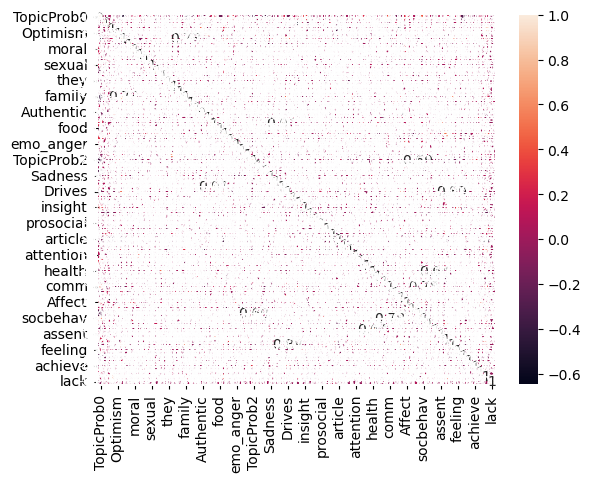

In [140]:
df = features.loc[:, top_70_feat]
corr_mat = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_mat, annot = True)
plt.show()

In [143]:
print(corr_mat)

              TopicProb0  focuspresent         i  Optimism  TopicProb3  \
TopicProb0      1.000000     -0.002361  0.018775 -0.043544   -0.448969   
focuspresent   -0.002361      1.000000  0.003568  0.027349    0.111538   
i               0.018775      0.003568  1.000000 -0.014139    0.128251   
Optimism       -0.043544      0.027349 -0.014139  1.000000   -0.067611   
TopicProb3     -0.448969      0.111538  0.128251 -0.067611    1.000000   
...                  ...           ...       ...       ...         ...   
death          -0.040757     -0.030805  0.014273 -0.043597    0.164102   
achieve        -0.079360      0.034605 -0.012384  0.081646    0.002139   
emo_pos         0.145883      0.044977  0.041147  0.056349    0.083176   
ppron           0.102576      0.080410  0.538174 -0.161157    0.226987   
lack           -0.082366      0.079601 -0.003244 -0.004622   -0.009692   

                 swear     moral    visual    allure    sexual  ...    assent  \
TopicProb0    0.118178  0.1823

In [175]:
print(corr_mat[abs(corr_mat) > 0.4])
features = list(corr_mat.columns)
for i in range(70):
    for j in range(i+1, 70):
        if pd.notna(corr_mat[abs(corr_mat) > 0.4].iloc[i,j]):
            if corr_mat.columns[j] in features:
                features.remove(corr_mat.columns[j])

              TopicProb0  focuspresent         i  Optimism  TopicProb3  swear  \
TopicProb0      1.000000           NaN       NaN       NaN   -0.448969    NaN   
focuspresent         NaN           1.0       NaN       NaN         NaN    NaN   
i                    NaN           NaN  1.000000       NaN         NaN    NaN   
Optimism             NaN           NaN       NaN       1.0         NaN    NaN   
TopicProb3     -0.448969           NaN       NaN       NaN    1.000000    NaN   
...                  ...           ...       ...       ...         ...    ...   
death                NaN           NaN       NaN       NaN         NaN    NaN   
achieve              NaN           NaN       NaN       NaN         NaN    NaN   
emo_pos              NaN           NaN       NaN       NaN         NaN    NaN   
ppron                NaN           NaN  0.538174       NaN         NaN    NaN   
lack                 NaN           NaN       NaN       NaN         NaN    NaN   

              moral  visual

In [179]:
features

['TopicProb0',
 'focuspresent',
 'i',
 'Optimism',
 'swear',
 'moral',
 'visual',
 'allure',
 'sexual',
 'time',
 'mental',
 'they',
 'want',
 'Period',
 'need',
 'you',
 'Conversation',
 'food',
 'Dic',
 'ipron',
 'emo_anger',
 'WC',
 'TopicProb2',
 'emo_anx',
 'home',
 'Sadness',
 'allnone',
 'leisure',
 'insight',
 'prep',
 'relig',
 'prosocial',
 'male',
 'negate',
 'article',
 'memory',
 'female',
 'attention',
 'friend',
 'certitude',
 'OtherP',
 'power',
 'comm',
 'focusfuture',
 'Affect',
 'conj',
 'feeling',
 'TopicProb1',
 'death',
 'achieve',
 'emo_pos',
 'lack']

In [68]:
sig_feat = ['TopicProb0',
 'focuspresent',
 'i',
 'Optimism',
 'swear',
 'moral',
 'allure',
 'sexual',
 'time',
 'mental',
 'they',
 'want',
 'Period',
 'you',
 'food',
 'emo_anger',
 'WC',
 'emo_anx',
 'insight',
 'prep',
 'relig',
 'negate',
 'memory',
 'female',
 'power',
 'comm',
 'feeling',
 'TopicProb1']

In [189]:
features.columns

Index(['Segment', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'BigWords', 'Dic', 'Linguistic',
       ...
       'Emoji', 'Anger', 'Joy', 'Optimism', 'Sadness', 'TopicProb0',
       'TopicProb1', 'TopicProb2', 'TopicProb3', 'TopicProb4'],
      dtype='object', length=128)

In [190]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(features.loc[:,sig_feat], y, test_size=0.2, random_state=448, stratify = y)

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [192]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 10, 'l1_ratio': 0.6}
Had balanced accuracy 0.5737088674223153


In [193]:
len(sig_feat)

28

In [23]:
import scipy
uni_df = scipy.sparse.coo_matrix.todense(uni_df)

In [57]:
uni_df_top_100 = mrmr.mrmr_classif(X = pd.DataFrame(uni_df), y = base_df["is_asshole"], K = 100)

100%|█████████████████████████████████████████████████████████████| 100/100 [06:32<00:00,  3.93s/it]


In [47]:
df_column_names = sorted(unigram_vectorizer.vocabulary_.items(), key=lambda x:x[1])

In [50]:
df_column_names = [x[0] for x in df_column_names]

In [62]:
uni_df = pd.DataFrame(uni_df)
uni_df.columns = df_column_names
uni_df_top_100_df = uni_df.loc[:,uni_df_top_100]

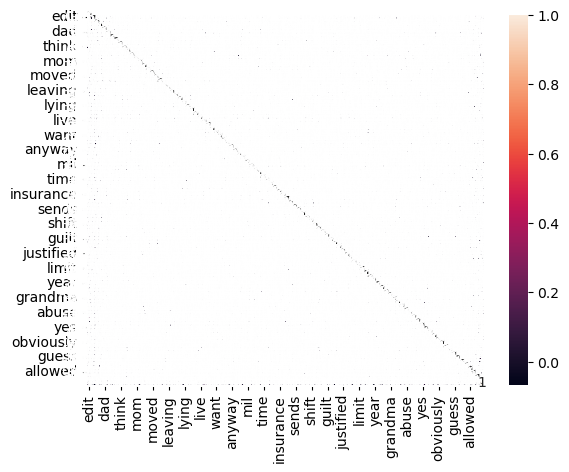

In [63]:
corr_mat = uni_df_top_100_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_mat, annot = True)
plt.show()

In [64]:
print(corr_mat[abs(corr_mat) > 0.4])
features = list(corr_mat.columns)
for i in range(70):
    for j in range(i+1, 70):
        if pd.notna(corr_mat[abs(corr_mat) > 0.4].iloc[i,j]):
            if corr_mat.columns[j] in features:
                features.remove(corr_mat.columns[j])

         edit  wanting  coming  wife  dad  admit  refusing  mother  think  \
edit      1.0      NaN     NaN   NaN  NaN    NaN       NaN     NaN    NaN   
wanting   NaN      1.0     NaN   NaN  NaN    NaN       NaN     NaN    NaN   
coming    NaN      NaN     1.0   NaN  NaN    NaN       NaN     NaN    NaN   
wife      NaN      NaN     NaN   1.0  NaN    NaN       NaN     NaN    NaN   
dad       NaN      NaN     NaN   NaN  1.0    NaN       NaN     NaN    NaN   
...       ...      ...     ...   ...  ...    ...       ...     ...    ...   
work      NaN      NaN     NaN   NaN  NaN    NaN       NaN     NaN    NaN   
allowed   NaN      NaN     NaN   NaN  NaN    NaN       NaN     NaN    NaN   
clarify   NaN      NaN     NaN   NaN  NaN    NaN       NaN     NaN    NaN   
obvious   NaN      NaN     NaN   NaN  NaN    NaN       NaN     NaN    NaN   
you       NaN      NaN     NaN   NaN  NaN    NaN       NaN     NaN    NaN   

         them  ...  staying  diagnosed  guess  fake  apologize  work  allow

In [67]:
uni_df_top_100_df.to_csv("uni_df_top_100.csv")

,TopicProb0,focuspresent,i,Optimism,swear,moral,allure,sexual,time,mental,...,insight,prep,relig,negate,memory,female,power,comm,feeling,TopicProb1
0,0.982506,0.483159,-0.108067,0.1170,2.944283,-0.701517,-0.927805,-0.288728,-1.031838,-0.264796,...,4.002143,2.125998,-0.236379,-1.237985,-0.275584,-1.027073,0.270262,0.815701,-0.882334,0.000000
1,0.127384,0.675740,-0.166604,0.1214,0.602538,-0.701517,0.113077,-0.288728,-0.049719,2.156224,...,-1.255193,0.127417,-0.236379,-1.506061,-0.275584,-1.027073,-0.984753,-1.232271,1.685091,0.119526
2,0.902487,-2.289110,2.500463,0.1122,-0.710258,-0.701517,0.273940,-0.288728,-2.505017,-0.264796,...,-1.855568,-2.607027,-0.236379,-2.190118,-0.275584,3.730767,-0.984753,2.978795,-0.882334,0.034550
3,0.900882,-2.289110,-2.109282,0.1121,-0.710258,-0.701517,-3.364416,-0.288728,-2.505017,-0.264796,...,-1.855568,-3.534473,-0.236379,-2.190118,-0.275584,-1.027073,-0.984753,0.003783,-0.882334,0.034475
4,0.938107,-2.289110,1.644368,0.1121,-0.710258,-0.701517,4.863284,-0.288728,-2.505017,-0.264796,...,-1.855568,-2.167252,-0.236379,-2.190118,-0.275584,-1.027073,-0.984753,3.590763,-0.882334,0.021991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97623,0.249288,0.868320,-0.547091,0.1122,-0.710258,-0.701517,-0.028862,-0.288728,-1.284519,-0.264796,...,-0.817082,-1.766664,-0.236379,-1.006884,3.066929,2.146883,1.354692,-0.129517,-0.882334,0.000000
97624,0.659647,-0.797728,0.151688,0.0363,-0.710258,-0.231219,-0.800061,-0.288728,0.775070,-0.264796,...,-0.841421,0.575900,-0.236379,-0.073239,-0.275584,-1.027073,-0.728876,0.464274,-0.515559,0.000000
97625,0.433089,-0.623061,-0.887334,0.0354,-0.710258,-0.096848,-1.225876,-0.288728,-1.618249,-0.264796,...,0.951590,0.184021,-0.236379,-0.711076,-0.275584,-1.027073,2.256352,-0.232521,-0.882334,0.000000
97626,0.000000,0.375672,0.938272,0.0316,0.691241,0.194289,-0.549303,-0.288728,-0.044951,2.319807,...,-1.214627,0.266751,0.615697,-0.720320,-0.275584,0.201056,0.952600,-0.238580,-0.183715,0.000000


In [89]:
uni_liwc = pd.concat([uni_df_top_100_df, features.loc[:,sig_feat]], axis = 1)

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(448)
y = base_df["is_asshole"]
X_train, X_test, y_train, y_test = train_test_split(uni_liwc, y, test_size=0.2, random_state=448, stratify = y)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
params = {'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
logistic_classifier = GridSearchCV(
    LogisticRegression(penalty = 'elasticnet', class_weight = 'balanced', solver = 'saga',  max_iter = 1000), 
    params, 
    n_jobs = 4, 
    cv = 5, 
    verbose = 3, 
    scoring = 'balanced_accuracy'
)
logistic_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

[CV 3/5] END ................C=0.01, l1_ratio=0;, score=0.572 total time=   7.0s
[CV 2/5] END ..............C=0.01, l1_ratio=0.2;, score=0.583 total time=  10.5s
[CV 2/5] END ..............C=0.01, l1_ratio=0.4;, score=0.583 total time=  11.2s
[CV 1/5] END ..............C=0.01, l1_ratio=0.6;, score=0.566 total time=  11.2s
[CV 5/5] END ..............C=0.01, l1_ratio=0.6;, score=0.570 total time=  11.5s
[CV 4/5] END ..............C=0.01, l1_ratio=0.8;, score=0.570 total time=  10.0s
[CV 3/5] END ................C=0.01, l1_ratio=1;, score=0.565 total time=  10.1s
[CV 1/5] END .................C=0.1, l1_ratio=0;, score=0.593 total time=  27.1s
[CV 1/5] END ...............C=0.1, l1_ratio=0.2;, score=0.594 total time=  43.6s
[CV 5/5] END ...............C=0.1, l1_ratio=0.2;, score=0.590 total time=  37.7s
[CV 4/5] END ...............C=0.1, l1_ratio=0.4;, score=0.595 total time=  49.1s
[CV 3/5] END ...............C=0.1, l1_ratio=0.6;, score=0.586 total time=  49.5s
[CV 2/5] END ...............

/Users/ahung/opt/anaconda3/envs/EECS448_Project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             scoring='balanced_accuracy', verbose=3)

In [92]:
print('Had optimal parameters' + str(logistic_classifier.best_params_))
y_pred = logistic_classifier.predict(X_test)
print("Had balanced accuracy " + str(balanced_accuracy_score(y_test, y_pred)))

Had optimal parameters{'C': 100, 'l1_ratio': 0}
Had balanced accuracy 0.5947132085903446
